## Chipotle Orders Data Analysis 

In [195]:
# Import python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [196]:
# Import data
url= "https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/chipotle.tsv" 
orders = pd.read_csv(url, sep= "\t")

# Display the first five rows of the dataset
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [197]:
# Remove "$" from the item_price column
orders.item_price= orders.item_price.str.replace("$", " ")
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [198]:
# Brief summary of the dataset
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [199]:
# Display the unique values in the item_price column
orders.item_price.unique()

array([' 2.39 ', ' 3.39 ', ' 16.98 ', ' 10.98 ', ' 1.69 ', ' 11.75 ',
       ' 9.25 ', ' 4.45 ', ' 8.75 ', ' 11.25 ', ' 8.49 ', ' 2.18 ',
       ' 8.99 ', ' 1.09 ', ' 2.95 ', ' 2.15 ', ' 3.99 ', ' 22.50 ',
       ' 11.48 ', ' 17.98 ', ' 17.50 ', ' 4.30 ', ' 5.90 ', ' 1.25 ',
       ' 23.78 ', ' 6.49 ', ' 11.08 ', ' 1.50 ', ' 22.16 ', ' 32.94 ',
       ' 22.20 ', ' 10.58 ', ' 2.50 ', ' 23.50 ', ' 7.40 ', ' 18.50 ',
       ' 3.00 ', ' 6.78 ', ' 11.89 ', ' 9.39 ', ' 4.00 ', ' 3.75 ',
       ' 8.69 ', ' 2.29 ', ' 8.90 ', ' 3.27 ', ' 3.89 ', ' 8.19 ',
       ' 35.00 ', ' 27.75 ', ' 11.80 ', ' 6.00 ', ' 26.25 ', ' 21.96 ',
       ' 4.36 ', ' 7.50 ', ' 4.78 ', ' 13.35 ', ' 6.45 ', ' 5.07 ',
       ' 22.96 ', ' 7.17 ', ' 7.98 ', ' 4.50 ', ' 26.07 ', ' 12.98 ',
       ' 35.25 ', ' 44.25 ', ' 10.50 ', ' 33.75 ', ' 16.38 ', ' 13.52 ',
       ' 5.00 ', ' 15.00 ', ' 8.50 ', ' 17.80 ', ' 1.99 ', ' 11.49 '],
      dtype=object)

In [200]:
# Convert item_price column to float datatype
orders.item_price = orders.item_price.str.strip().astype(float)
chip.item_price.head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [201]:
# A concise statistical summary of the item_price column
orders.item_price.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

### The top ten foods ordered

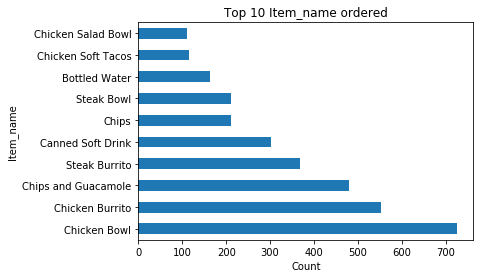

In [202]:
orders.item_name.value_counts()[:10].plot.barh()
plt.xlabel("Count")
plt.ylabel("Item_name")
plt.title("Top 10 Item_name ordered");

## Movie Users Data Analysis

In [203]:
# Read the dataset
user_cols = ["user_id", "age", "gender", "occupation", "zip_code"] 
users = pd.read_csv("http://bit.ly/movieusers", sep="|", header=None, names=user_cols)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [204]:
# Dataset summary
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [205]:
# Convert gender column to "category"
users.gender = users.gender.astype("category")

In [206]:
# find the average age for each gender 
users.groupby("gender")["age"].mean()

gender
F    33.813187
M    34.149254
Name: age, dtype: float64

In [207]:
# Statistical summary of age
users.age.describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

### Which occupation group does watch the movie most?

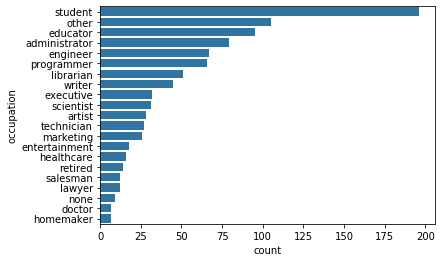

In [208]:
color = sns.color_palette()[0]
order = (users.occupation.value_counts()).index
sns.countplot(data=users, y= "occupation", order= order, color= color);